# NYC crime EDA

In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import geoplot
from shapely.geometry import Polygon, Point

path = 'C:/Users/Zaca/Documents/Datasets/nyc/'

In [4]:
crime = pd.read_csv(path + 'nypd_historic_clean.csv', index_col=0)

C:\Users\Zaca\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
crime.shape

(5717178, 9)

In [125]:
crime

,date,time,precinct,class_code,description,level,borough,premises,geo
0,2008-04-10,19,73,341,PETIT LARCENY,MISDEMEANOR,BROOKLYN,STREET,"(40.669413836, -73.91260308)"
1,2007-06-03,15,28,236,DANGEROUS WEAPONS,MISDEMEANOR,MANHATTAN,STREET,"(40.801978284, -73.945511151)"
2,2010-02-16,20,102,105,ROBBERY,FELONY,QUEENS,GROCERY/BODEGA,"(40.699990268, -73.830977746)"
3,2009-11-10,16,79,341,PETIT LARCENY,MISDEMEANOR,BROOKLYN,FOOD SUPERMARKET,"(40.681004729, -73.955034577)"
5,2011-06-23,20,81,118,DANGEROUS WEAPONS,FELONY,BROOKLYN,STREET,"(40.678337995, -73.925577614)"
...,...,...,...,...,...,...,...,...,...
6847939,2015-08-23,2,75,340,FRAUDS,MISDEMEANOR,BROOKLYN,STREET,"(40.672269995, -73.875569231)"
6847940,2013-06-15,11,32,578,HARRASSMENT 2,VIOLATION,MANHATTAN,RESIDENCE - PUBLIC HOUSING,"(40.829882139, -73.9367581)"
6847941,2012-07-12,14,49,106,FELONY ASSAULT,FELONY,BRONX,STREET,"(40.846592354, -73.852913364)"
6847942,2012-04-15,19,112,341,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,"(40.728720422, -73.853512684)"


In [153]:
prec = crime[crime.precinct == 75]

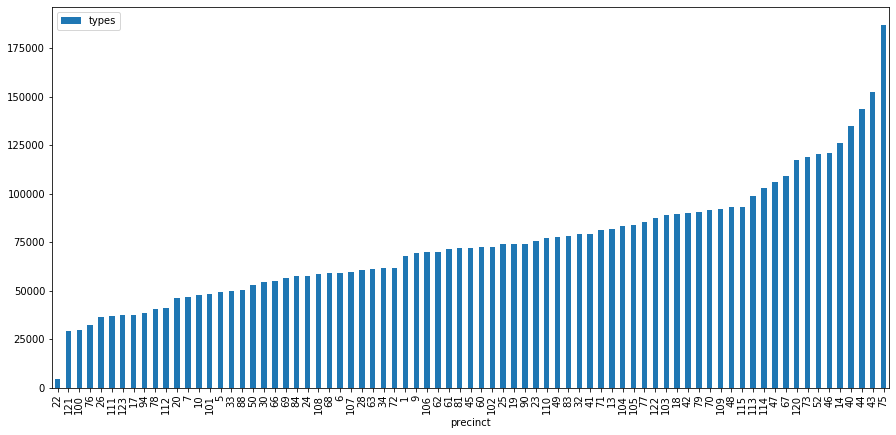

In [132]:
crime.groupby('precinct').agg(types=('level','count')).sort_values('types').plot(kind='bar', figsize=(15, 7))

In [254]:
test = crime[(crime.precinct == 75) & (crime.time == 16)]

In [16]:
region = geopandas.read_file(path + 'nypd_precincts.shp').to_crs(epsg=4326)

p75 = region[region['pct'] == '075']

In [264]:
coords = [x.replace('(', '').replace(')','').split(', ') for x in test.geo]

hey = []
for c in coords:
    hey += [[float(x) for x in c]]
    

In [261]:
crimes = [Point(y, x) for x, y in hey]

In [249]:
region

,patrol_bor,pct,phase,sct_text,sctr_float,sector,sq_feet,sq_mile_ne,sq_miles,date_start,time_start,geometry
0,PBQS,102,14,102A,0.0,102A,3.927381e+07,1.408754,1.408760,2018-07-09,00:00:00.000,"POLYGON ((-73.84120 40.68335, -73.84125 40.683..."
1,PBQS,102,14,102B,1.0,102B,2.939626e+07,1.054446,1.054450,2018-07-09,00:00:00.000,"POLYGON ((-73.84451 40.68242, -73.84494 40.682..."
2,PBQS,102,14,102C,2.0,102C,2.375686e+07,0.852160,0.852163,2018-07-09,00:00:00.000,"POLYGON ((-73.82611 40.71557, -73.82605 40.715..."
3,PBQS,102,14,102D,3.0,102D,4.088754e+07,1.466639,1.466645,2018-07-09,00:00:00.000,"POLYGON ((-73.83681 40.70844, -73.83694 40.708..."
4,PBQN,104,15,104A,4.0,104A,4.451591e+07,2.194020,1.596795,2018-10-01,00:00:00.000,"POLYGON ((-73.85845 40.70578, -73.85828 40.705..."
...,...,...,...,...,...,...,...,...,...,...,...,...
297,PBBS,061,12,061C,340.0,61C,2.529982e+07,0.907506,0.907510,2018-01-22,00:00:00.000,"POLYGON ((-73.93609 40.60387, -73.93426 40.602..."
298,PBBS,061,12,061D,341.0,61D,4.940196e+07,1.772051,1.772059,2018-01-22,00:00:00.000,"POLYGON ((-73.93183 40.59299, -73.93176 40.592..."
299,PBSI,120,03,120A,336.0,120A,5.166329e+07,1.853165,1.853173,2015-12-14,00:00:00.000,"POLYGON ((-74.08777 40.63172, -74.08773 40.631..."
300,PBSI,120,03,120B,337.0,120B,3.139478e+07,1.126133,1.126137,2015-12-14,00:00:00.000,"POLYGON ((-74.07337 40.63661, -74.07347 40.636..."


In [250]:
crimes

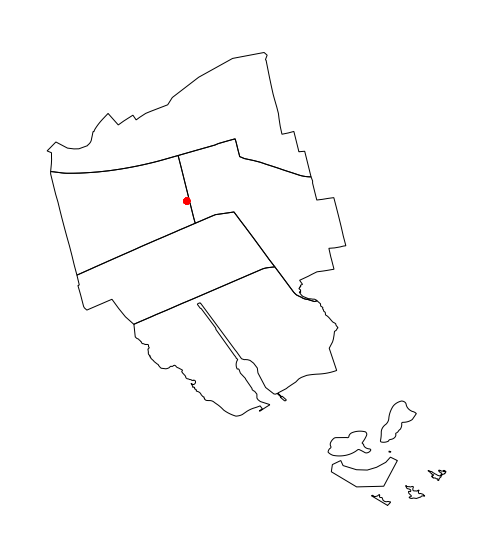

In [262]:
ax = geoplot.polyplot(p75, figsize=(10, 10), lw= 1, facecolor= 'none', edgecolor='k', alpha=1);

colorz = test.level.map(color_dict)
xcoords = [p.x for p in crimes]
ycoords = [p.y for p in crimes]
ax.scatter(xcoords[:1000], ycoords[:1000], c=colorz[:1000], alpha=.5) 

In [252]:
color_dict = {'FELONY': 'r', 'MISDEMEANOR': 'b', 'VIOLATION': 'g'}

In [265]:
test = crime[(crime.precinct == 75) & (crime.description == 'RAPE')]

In [257]:
test.description.value_counts()

RAPE    653
Name: description, dtype: int64

<

In [82]:
crime.description.value_counts()

PETIT LARCENY                     942523
HARRASSMENT 2                     718863
ASSAULT 3 & RELATED OFFENSES      610543
CRIMINAL MISCHIEF & RELATED OF    579715
GRAND LARCENY                     486061
DANGEROUS DRUGS                   381918
OFF. AGNST PUB ORD SENSBLTY &     320372
FELONY ASSAULT                    220083
ROBBERY                           217987
BURGLARY                          205444
MISCELLANEOUS PENAL LAW           142628
DANGEROUS WEAPONS                 139258
OFFENSES AGAINST PUBLIC ADMINI    114238
GRAND LARCENY OF MOTOR VEHICLE    111937
INTOXICATED & IMPAIRED DRIVING     80306
CRIMINAL TRESPASS                  71114
VEHICLE AND TRAFFIC LAWS           70350
SEX CRIMES                         64711
THEFT-FRAUD                        62206
FORGERY                            57481
FRAUDS                             36745
POSSESSION OF STOLEN PROPERTY      30943
OFFENSES INVOLVING FRAUD           18892
UNAUTHORIZED USE OF A VEHICLE      16964
RAPE            

In [103]:
test = crime[(crime.precinct == 75) & (crime.date > '2017-01-01') & (crime.date < '2017-02-01') & (crime.description == 'BURGLARY')]
test

,date,time,precinct,class_code,description,level,borough,premises,geo
3850573,2017-01-25,8,75,107,BURGLARY,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,"(40.674344622, -73.870215438)"
3890842,2017-01-25,8,75,107,BURGLARY,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,"(40.679567407, -73.867346229)"
3900616,2017-01-05,10,75,107,BURGLARY,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,"(40.667757463, -73.86807624)"
3984212,2017-01-17,16,75,107,BURGLARY,FELONY,BROOKLYN,RESIDENCE-HOUSE,"(40.661800413, -73.867316682)"
4141291,2017-01-09,22,75,107,BURGLARY,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,"(40.674211166, -73.871138593)"
4166390,2017-01-15,18,75,107,BURGLARY,FELONY,BROOKLYN,RESIDENCE-HOUSE,"(40.674209346, -73.893511607)"
4371992,2017-01-27,22,75,107,BURGLARY,FELONY,BROOKLYN,STREET,"(40.667266581, -73.870878053)"
4382080,2017-01-13,17,75,107,BURGLARY,FELONY,BROOKLYN,COMMERCIAL BUILDING,"(40.677693214, -73.897352844)"
4459012,2017-01-18,12,75,107,BURGLARY,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,"(40.651228906, -73.881151147)"
4518830,2017-01-10,2,75,107,BURGLARY,FELONY,BROOKLYN,CHAIN STORE,"(40.657739603, -73.868597031)"


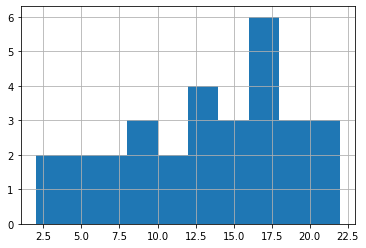

In [104]:
test.time.hist()

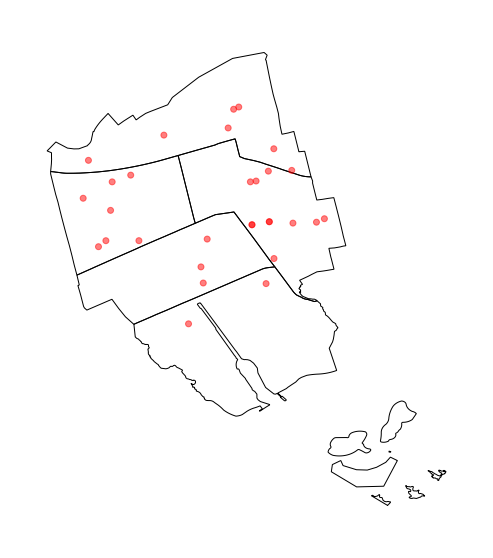

In [105]:
ax = geoplot.polyplot(p75, figsize=(10, 10), lw= 1, facecolor= 'none', edgecolor='k', alpha=1);

coords = [x.replace('(', '').replace(')','').split(', ') for x in test.geo]

color_dict = {'FELONY': 'r', 'MISDEMEANOR': 'b', 'VIOLATION': 'g'}
colors = test.level.map(color_dict)
hey = []
for c in coords:
    hey += [[float(x) for x in c]]
    
crimes = [Point(y, x) for x, y in hey]
xcoords = [p.x for p in crimes]
ycoords = [p.y for p in crimes]
ax.scatter(xcoords, ycoords, c=colors, alpha=.5) 

In [106]:
import seaborn as sns

In [107]:
test['geoloc'] = test['geo'].str.replace('(','').str.replace(')', '').str.split(', ')
test['latitude'] = test['geoloc'].apply(lambda x: x[0]).astype('float64')
test['longitude'] = test['geoloc'].apply(lambda x: x[1]).astype('float64')

C:\Users\Zaca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Zaca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Zaca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

C:\Users\Zaca\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

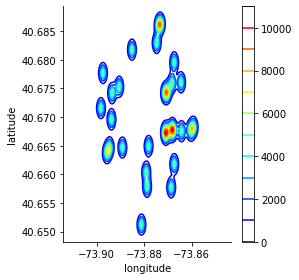

In [108]:
plt.figure(figsize=(10, 10))
ax = sns.lmplot('longitude', 'latitude',
                data= test[['longitude','latitude']],
                fit_reg=False,
                size=4, 
                scatter_kws={'alpha':.1})
ax = sns.kdeplot(xcoords, ycoords,
                 cmap="jet", 
                 bw=.001,
                 #n_levels=10,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False)

C:\Users\Zaca\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


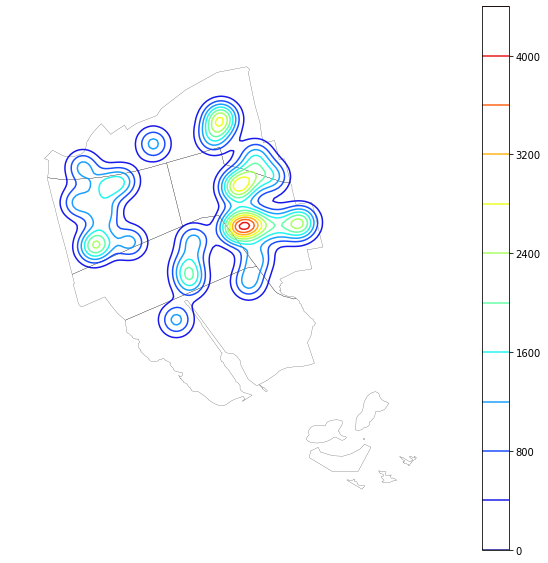

In [109]:
ax = geoplot.polyplot(p75, figsize=(10, 10), lw= .2, facecolor= 'none', edgecolor='k', alpha=1);
ax = sns.kdeplot(xcoords, ycoords,
                 cmap="jet", 
                 bw=.002,
                 #n_levels=10,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False,
                 alpha=.9,
                lw=5)

In [110]:
test.description.value_counts()

BURGLARY    30
Name: description, dtype: int64